# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from fbprophet import Prophet
from pandas.plotting import lag_plot
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Importing plotly failed. Interactive plots will not work.


# Case 1

In [2]:
df = pd.read_csv('TFP.csv')

In [3]:
df

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179
...,...,...,...
181,MEX,2007,1.013673
182,MEX,2008,0.991548
183,MEX,2009,0.915879
184,MEX,2010,0.941604


In [4]:
mask1 = df['isocode'] == 'USA'
mask2 = df['isocode'] == 'CAN'
mask3 = df['isocode'] == 'MEX'

In [5]:
df_usa = df[mask1].drop(columns=['isocode'])
df_can = df[mask2].drop(columns=['isocode'])
df_mex = df[mask3].drop(columns=['isocode'])

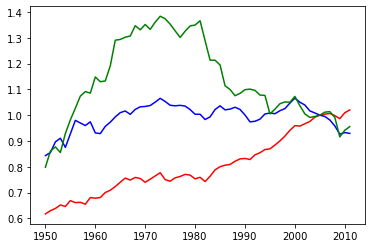

In [6]:
plt.plot(df_usa['year'], df_usa['rtfpna'], 'r-', df_can['year'], df_can['rtfpna'], 'blue', df_mex['year'], df_mex['rtfpna'], 'green')
plt.show()

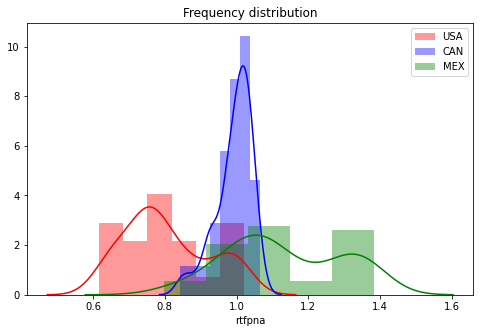

In [7]:
plt.figure(figsize=(8,5))
sns.distplot(df_usa['rtfpna'], color='red',label='USA')
sns.distplot(df_can['rtfpna'], color='blue',label='CAN')
sns.distplot(df_mex['rtfpna'], color='green',label='MEX')
plt.legend()
plt.title('Frequency distribution')
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

## Forecast

In [8]:
df_usa = df_usa.rename({'year':'ds','rtfpna':'y'},axis=1)
df_can = df_can.rename({'year':'ds','rtfpna':'y'},axis=1)
df_mex = df_mex.rename({'year':'ds','rtfpna':'y'},axis=1)

In [9]:
df_usa.ds = pd.to_datetime(df_usa.ds, format='%Y')
df_can.ds = pd.to_datetime(df_can.ds, format='%Y')
df_mex.ds = pd.to_datetime(df_mex.ds, format='%Y')

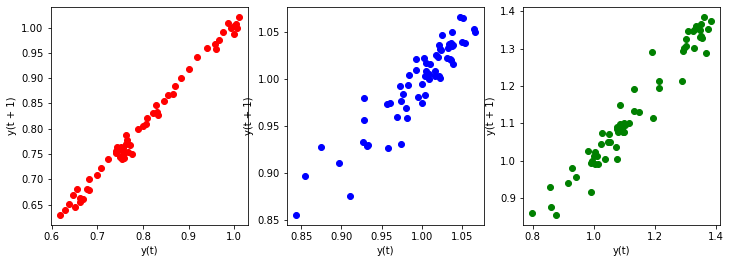

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
lag_plot(df_usa['y'], c='red', ax = ax[0])
lag_plot(df_can['y'], c='blue', ax = ax[1])
lag_plot(df_mex['y'], c='green', ax = ax[2])

No lag plot, podemos verificar se existe uma relação entre o período anterior com o período seguinte.

Podemos dizer que nos USA existe uma forte relação entre o período anterior com o período seguinte mais forte do que os demais países que estamos analisando.

### USA

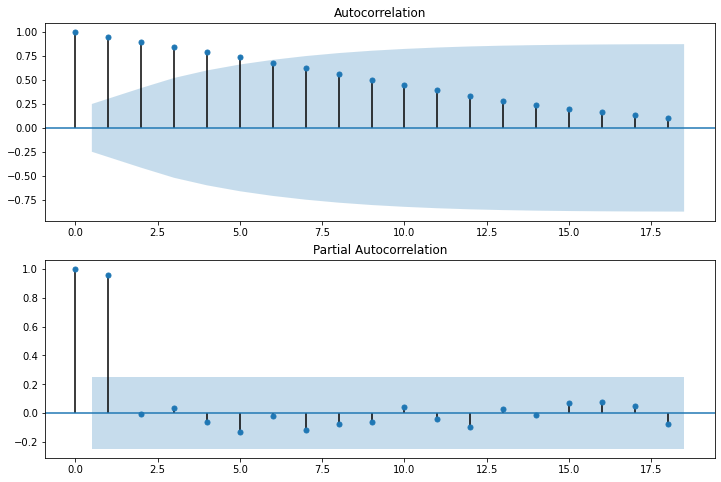

In [11]:
fig, ax = plt.subplots(2, 1,figsize=(12,8))
plot_acf(x=df_usa.y, ax=ax[0])
plot_pacf(x=df_usa.y, ax=ax[1]);

Decomposing a time series into:
    
- Mean
- Trends
- Seasonal Effects
- Noise

In [12]:
res = sm.tsa.seasonal_decompose(df_usa['y'], period=6)
observed = res.observed
seasonal = res.seasonal
residual = res.resid
trend = res.trend

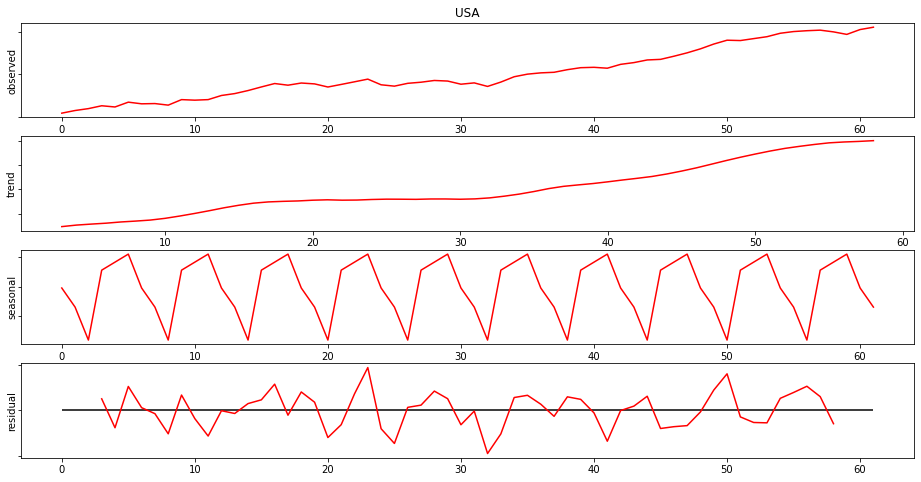

In [17]:
df_res = pd.DataFrame({"observed":observed,"trend":trend, "seasonal":seasonal,"residual":residual})
plt.figure(figsize=(16,8))

plt.subplot(411)
sns.lineplot(x=df_res.index, y='observed', data=df_res, color ='red')
plt.title('USA')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.subplot(412)
sns.lineplot(x=df_res.index, y='trend', data=df_res, color ='red')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.subplot(413)
sns.lineplot(x=df_res.index, y='seasonal', data=df_res, color ='red')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.subplot(414)
sns.lineplot(x=df_res.index, y='residual', data=df_res, color ='red')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)
plt.hlines(y=0,xmin=df_res.index.min(), xmax=df_res.index.max())
plt.show()

In [14]:
adfuller(df_usa['y'], autolag='AIC', regression='ct')

- p-value (neste não pode rejeitar que a times series é estacionária) #ver isso
- 

(-1.4149604461402028,
 0.856467046010545,
 0,
 61,
 {'1%': -4.115412397821844,
  '5%': -3.485092052154145,
  '10%': -3.170590307779065},
 -302.65363491879026)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


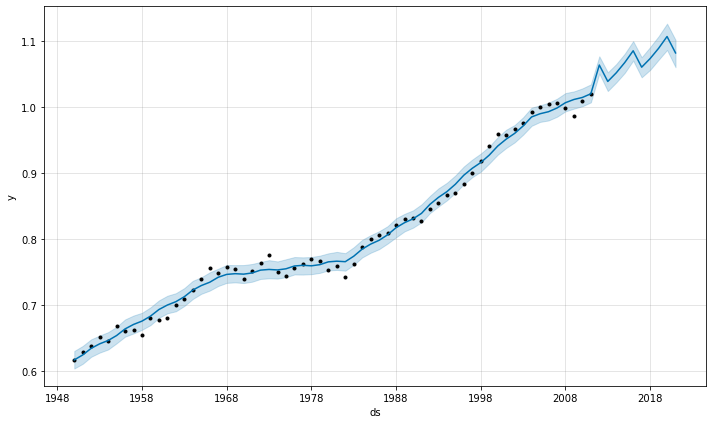

In [25]:
model = Prophet(changepoint_range=1)
model.fit(df_usa) #df_usa.iloc[30:,:]
future = model.make_future_dataframe(periods=10,freq='Y')
forecast = model.predict(future)
forecast_plot = model.plot(forecast)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-01,0.147045,0.738172,0.760009,0.147045,0.147045,0.601768,0.601768,0.601768,0.601768,0.601768,0.601768,0.0,0.0,0.0,0.748813
1,1981-01-01,0.155679,0.743467,0.764590,0.155679,0.155679,0.599128,0.599128,0.599128,0.599128,0.599128,0.599128,0.0,0.0,0.0,0.754807
2,1982-01-01,0.164290,0.751699,0.772283,0.164290,0.164290,0.597767,0.597767,0.597767,0.597767,0.597767,0.597767,0.0,0.0,0.0,0.762058
3,1983-01-01,0.172901,0.761339,0.781779,0.172901,0.172901,0.598647,0.598647,0.598647,0.598647,0.598647,0.598647,0.0,0.0,0.0,0.771548
4,1984-01-01,0.181512,0.773638,0.792923,0.181512,0.181512,0.601768,0.601768,0.601768,0.601768,0.601768,0.601768,0.0,0.0,0.0,0.783280
5,1985-01-01,0.190146,0.779499,0.799641,0.190146,0.190146,0.599128,0.599128,0.599128,0.599128,0.599128,0.599128,0.0,0.0,0.0,0.789274
6,1986-01-01,0.198742,0.786537,0.806840,0.198742,0.198742,0.597767,0.597767,0.597767,0.597767,0.597767,0.597767,0.0,0.0,0.0,0.796509
7,1987-01-01,0.207337,0.795723,0.816208,0.207337,0.207337,0.598647,0.598647,0.598647,0.598647,0.598647,0.598647,0.0,0.0,0.0,0.805984
8,1988-01-01,0.215931,0.806419,0.827550,0.215931,0.215931,0.601768,0.601768,0.601768,0.601768,0.601768,0.601768,0.0,0.0,0.0,0.817699
9,1989-01-01,0.224549,0.813486,0.833981,0.224549,0.224549,0.599128,0.599128,0.599128,0.599128,0.599128,0.599128,0.0,0.0,0.0,0.823677


### CAN

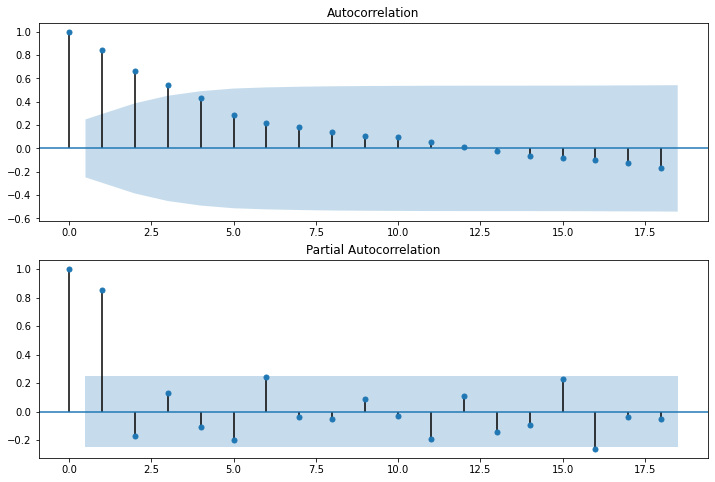

In [18]:
fig, ax = plt.subplots(2, 1,figsize=(12,8))
plot_acf(x=df_can.y, ax=ax[0])
plot_pacf(x=df_can.y, ax=ax[1]);

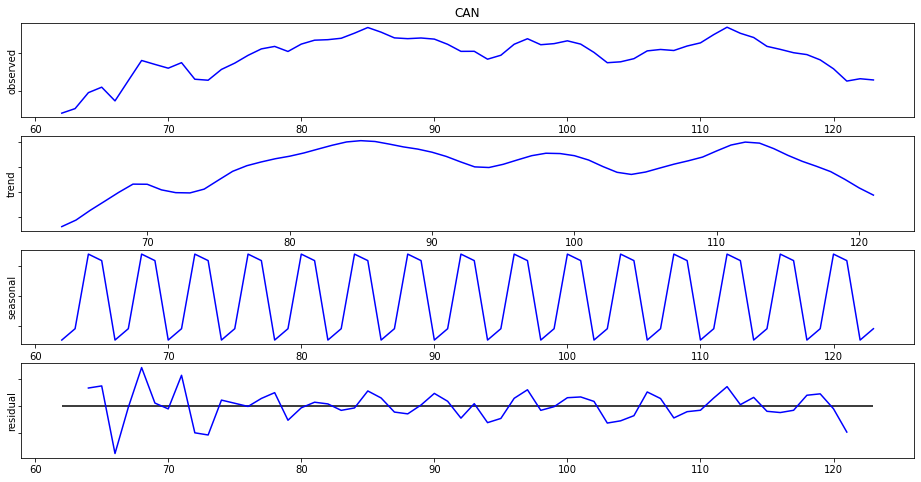

In [20]:
res = sm.tsa.seasonal_decompose(df_can['y'], period=4)
observed = res.observed
seasonal = res.seasonal
residual = res.resid
trend = res.trend

df_res = pd.DataFrame({"observed":observed,"trend":trend, "seasonal":seasonal,"residual":residual})
plt.figure(figsize=(16,8))

plt.subplot(411)
sns.lineplot(x=df_res.index, y='observed', data=df_res, color ='blue')
plt.title('CAN')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.subplot(412)
sns.lineplot(x=df_res.index, y='trend', data=df_res, color ='blue')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.subplot(413)
sns.lineplot(x=df_res.index, y='seasonal', data=df_res, color ='blue')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.subplot(414)
sns.lineplot(x=df_res.index, y='residual', data=df_res, color ='blue')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)
plt.hlines(y=0,xmin=df_res.index.min(), xmax=df_res.index.max())
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


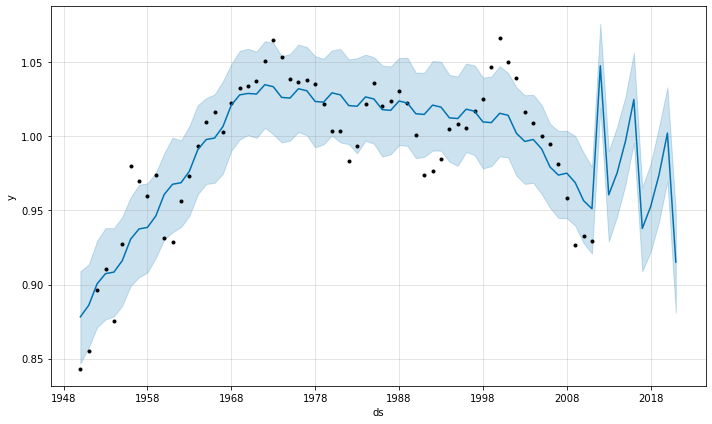

In [30]:
model = Prophet(changepoint_range=1)
model.fit(df_can)
future = model.make_future_dataframe(periods=10,freq='Y')
forecast = model.predict(future)
forecast_plot = model.plot(forecast)
#components_plot_forecast = model.plot_components(forecast)

In [31]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-01-01,0.365645,0.846701,0.908993,0.365645,0.365645,0.512591,0.512591,0.512591,0.512591,0.512591,0.512591,0.0,0.0,0.0,0.878236
1,1951-01-01,0.373179,0.857598,0.913555,0.373179,0.373179,0.512818,0.512818,0.512818,0.512818,0.512818,0.512818,0.0,0.0,0.0,0.885997
2,1952-01-01,0.380713,0.871213,0.929474,0.380713,0.380713,0.519804,0.519804,0.519804,0.519804,0.519804,0.519804,0.0,0.0,0.0,0.900516
3,1953-01-01,0.388267,0.876483,0.938086,0.388267,0.388267,0.519123,0.519123,0.519123,0.519123,0.519123,0.519123,0.0,0.0,0.0,0.907390
4,1954-01-01,0.395801,0.878561,0.938050,0.395801,0.395801,0.512591,0.512591,0.512591,0.512591,0.512591,0.512591,0.0,0.0,0.0,0.908392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2016-12-31,0.404311,0.908923,0.965347,0.399509,0.408457,0.533534,0.533534,0.533534,0.533534,0.533534,0.533534,0.0,0.0,0.0,0.937845
68,2017-12-31,0.398640,0.922020,0.981577,0.392550,0.404038,0.553984,0.553984,0.553984,0.553984,0.553984,0.553984,0.0,0.0,0.0,0.952624
69,2018-12-31,0.392969,0.942512,1.006315,0.385670,0.399767,0.581117,0.581117,0.581117,0.581117,0.581117,0.581117,0.0,0.0,0.0,0.974086
70,2019-12-31,0.387298,0.969787,1.033042,0.378467,0.395591,0.614884,0.614884,0.614884,0.614884,0.614884,0.614884,0.0,0.0,0.0,1.002181
